In [26]:
import pandas as pd
import numpy as np

In [27]:
import seaborn as sn
import matplotlib.pyplot as plt

In [28]:
from urbanmetabolism.population.model import plot_projected_weights, plot_data_projection, _merge_data

In [29]:
iterations = 1000
typ = 'resampled'
model_name = 'Sorsogon_Electricity_Water_wbias_projected_dynamic_{}'.format(typ)
reweighted_survey = 'data/survey_{}_{}'.format(model_name, iterations)

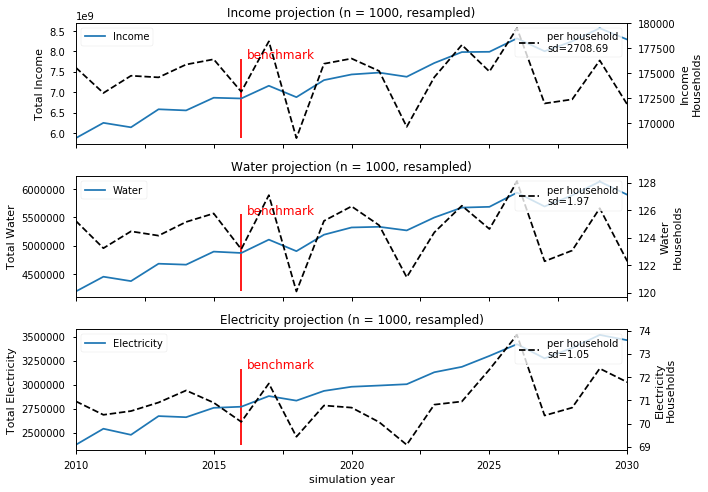

In [30]:
var = ['Income', 'Water', 'Electricity']
data = plot_data_projection(
    reweighted_survey, var, "{}, {}".format(iterations, typ),
    benchmark_year=2016 
)

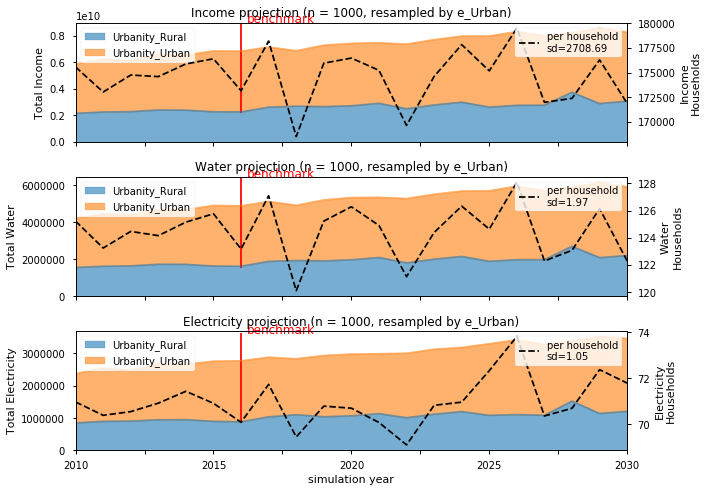

In [31]:
var = ['Income', 'Water', 'Electricity']
groupby = 'e_Urban'
data = plot_data_projection(
    reweighted_survey, var, "{}, {} by {}".format(iterations, typ, groupby),
    benchmark_year = 2016,
    groupby = groupby
)

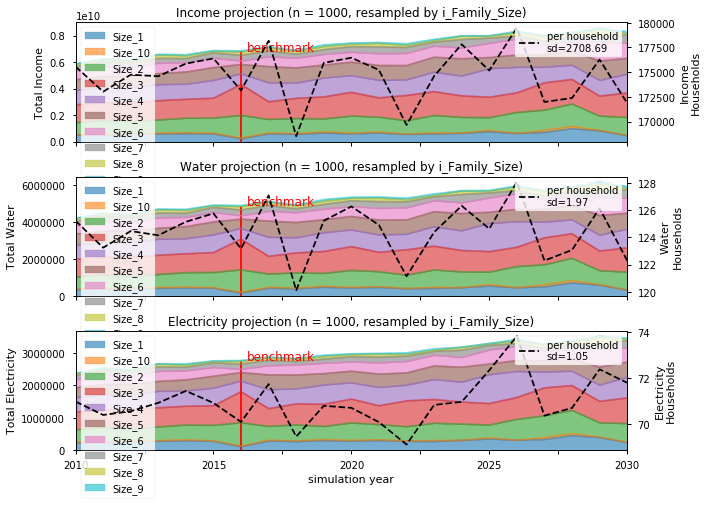

In [32]:
var = ['Income', 'Water', 'Electricity']
groupby = 'i_Family_Size'
data = plot_data_projection(
    reweighted_survey, var, "{}, {} by {}".format(iterations, typ, groupby),
    benchmark_year = 2016,
    groupby = groupby
)

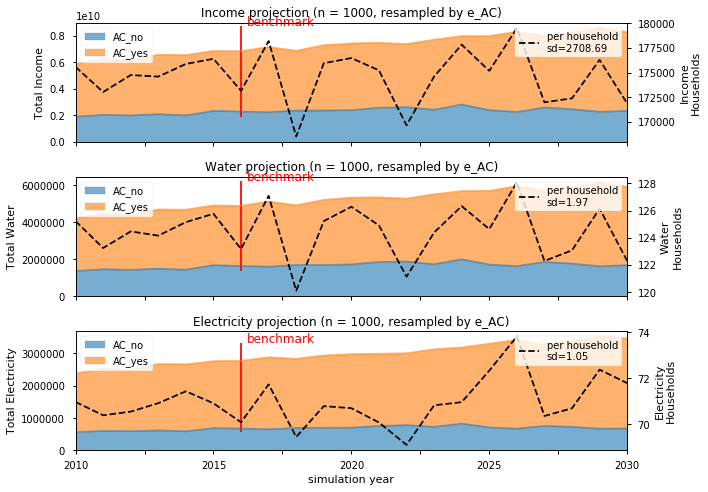

In [33]:
var = ['Income', 'Water', 'Electricity']
groupby = 'e_AC'
data = plot_data_projection(
    reweighted_survey, var, "{}, {} by {}".format(iterations, typ, groupby),
    benchmark_year = 2016,
    groupby = groupby
)

In [34]:
pr = [i for i in np.linspace(0.1, 0.6, num=14)]
pr = [0]*7 + pr
scenario_name = 'scenario 1'

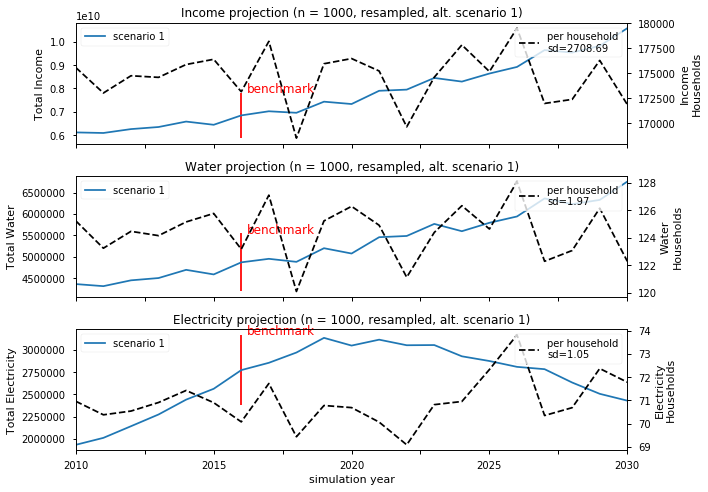

In [35]:
var = ['Income', 'Water', 'Electricity']
data = plot_data_projection(
    reweighted_survey, var, "{}, {}, alt. scenario 1".format(iterations, typ),
    benchmark_year=2016, pr = pr, scenario_name = scenario_name
)

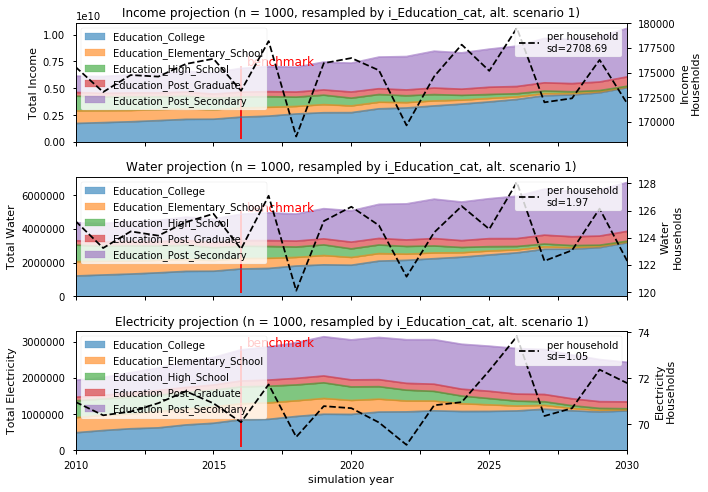

In [36]:
var = ['Income', 'Water', 'Electricity']
groupby = 'i_Education_cat'
data = plot_data_projection(
    reweighted_survey, var, "{}, {} by {}, alt. scenario 1".format(iterations, typ, groupby),
    benchmark_year = 2016, pr = pr, scenario_name = scenario_name,
    groupby = groupby
)

In [37]:
pr = [i for i in np.linspace(0.1, 0.8, num=14)]
pr = [0]*7 + pr
scenario_name = 'scenario 2'

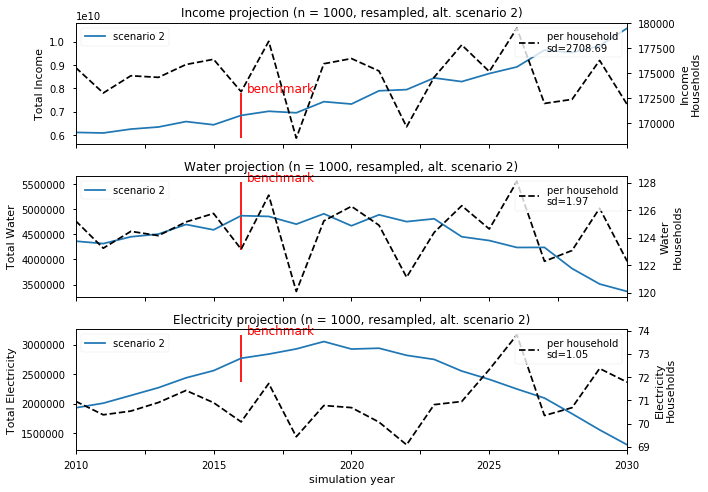

In [38]:
var = ['Income', 'Water', 'Electricity']
data = plot_data_projection(
    reweighted_survey, var, "{}, {}, alt. scenario 2".format(iterations, typ),
    benchmark_year=2016, pr = pr, scenario_name = scenario_name
)

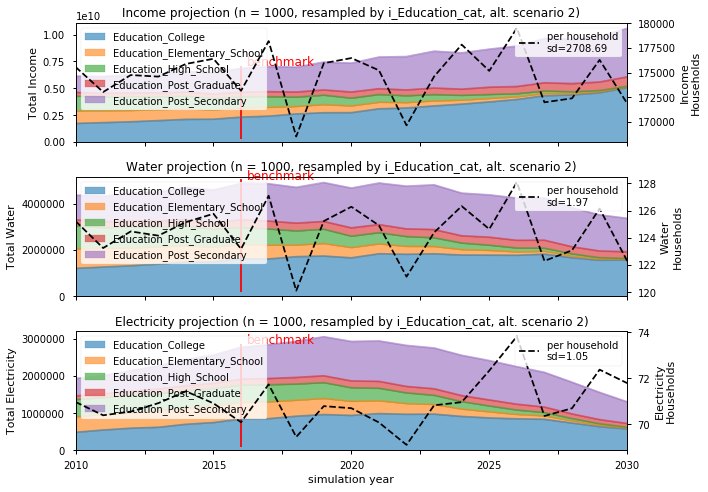

In [39]:
var = ['Income', 'Water', 'Electricity']
groupby = 'i_Education_cat'
data = plot_data_projection(
    reweighted_survey, var, "{}, {} by {}, alt. scenario 2".format(iterations, typ, groupby),
    benchmark_year = 2016, pr = pr, scenario_name = scenario_name,
    groupby = groupby
)

In [40]:
def get_survey(reweighted_survey, year):
    if isinstance(reweighted_survey, str):
        plot_survey = pd.read_csv(
            reweighted_survey + "_{}.csv".format(year), index_col = 0)
        weight = 'wf'
    else:
        plot_survey = reweighted_survey
        weight = str(year)
    return(plot_survey, weight)

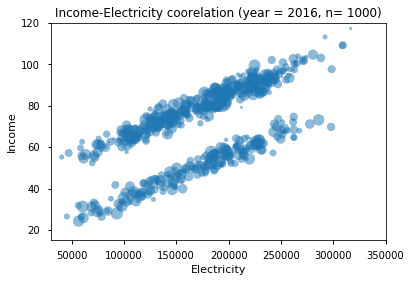

In [41]:
plot_survey, _ = get_survey(reweighted_survey, 2016)
fig, ax = plt.subplots()
ax.scatter(x='Income', y='Electricity',
           s='wf', alpha=0.5,
           data=plot_survey)
ax.set_ylabel('Income')
ax.set_xlabel('Electricity')
ax.set_ylim(15, 120)
ax.set_xlim(30000, 350000)
ax.set_title('Income-Electricity coorelation (year = 2016, n= {})'.format(iterations))
plt.savefig('FIGURES/w_{}_income_elec.png'.format(typ), dpi=300)

In [42]:
#for year in range(2010, 2031):
#    plot_survey, weight = get_survey(reweighted_survey, year)
#    fig, ax = plt.subplots()
#    ax.scatter(x='Income', y='Electricity',
#               s=weight, alpha=0.5, data=plot_survey)
#    ax.set_ylabel('Income')
#    ax.set_xlabel('Electricity')
#    ax.set_ylim(15, 120)
#    ax.set_xlim(30000, 350000)
#    ax.set_title('Income-Electricity coorelation (year = {}, n= {}, {})'.format(year, iterations, typ))
#    plt.savefig('FIGURES/w_{}_income_elec_{}.png'.format(typ, year), dpi=300)

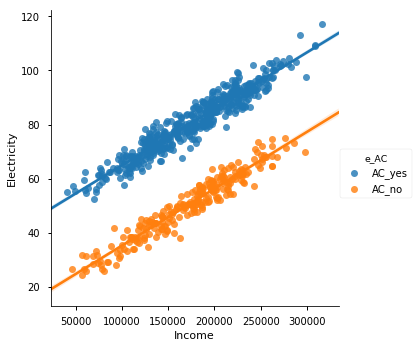

In [43]:
plot_survey, _ = get_survey(reweighted_survey, 2016)
sn.lmplot(x='Income', y='Electricity', data=plot_survey, hue='e_AC')
plt.savefig('FIGURES/w_{}_income_elec_AC.png'.format(typ), dpi=300)

In [44]:
#sn.lmplot(x='Income', y='Electricity', data=reweighted_survey, hue='e_Refrigeration')
#plt.savefig('FIGURES/w_income_elec_Ref.png', dpi=300)

In [45]:
#sn.lmplot(x='Income', y='Electricity', data=reweighted_survey, hue='e_Refrigeration', col='e_AC')
#plt.savefig('FIGURES/w_income_elec_AC-Ref.png', dpi=300)

In [46]:
def plot_traj(var, survey, group):
    inx = [str(i) for i in range(2010, 2031)]
    if isinstance(reweighted_survey, str):
        plot_data, _ = _merge_data(reweighted_survey, inx, var, group = group)
        #plot_data = _merge_data(survey, inx, var, group = 'AC_yes')
        ylabel = 'Number of households on sample'
    else:
        inx.append(var)
        plot_data = survey.loc[:, inx].groupby(var).sum()
        ylabel = 'Absolute number of households'
    plot_data = plot_data.T
    ax = plot_data.plot()
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Simulation year')
    plt.tight_layout()
    plt.savefig('FIGURES/var_traj_{}_{}.png'.format(typ, var), dpi=300)

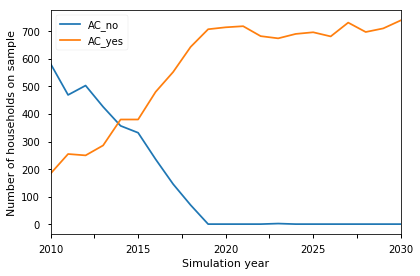

In [47]:
pld = plot_traj('e_AC', reweighted_survey, 'AC_yes')

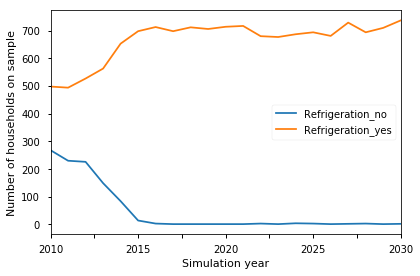

In [48]:
plot_traj('e_Refrigeration', reweighted_survey, 'Refrigeration_yes')

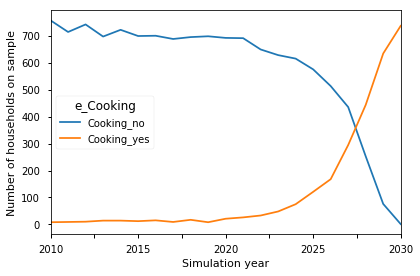

In [49]:
plot_traj('e_Cooking', reweighted_survey, 'Cooking_yes')

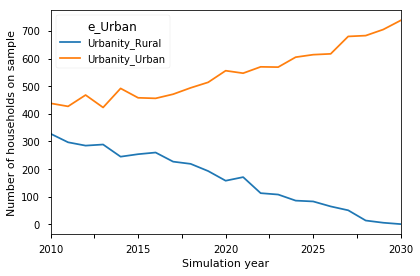

In [50]:
plot_traj('e_Urban', reweighted_survey, 'Urbanity_Urban')